In [143]:
#import os
import seaborn as sns
color = sns.color_palette()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('fivethirtyeight')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore warnings from sklearn and seaborn

In [144]:
df_train_values = pd.read_csv('train_values.csv')
df_train_labels = pd.read_csv('train_labels.csv')
df_train = pd.merge(df_train_values, df_train_labels, on='row_id')
df_test = pd.read_csv('test_values.csv')

In [203]:
# show descriptive stats:
df_train.describe()

,row_id,loan_amount,msa_md,state_code,county_code,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,minority_population,tract_family_income
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,249999.500000,4.943617,185.456072,25.180956,145.401634,4.309344,8.496477,31.225669,69158.876302,92.200385,7.133687,7.427522,3720.121344,0.400052,0.500228,5029.865231,63649.157096
std,144337.711635,1.053539,133.596371,15.384419,99.075152,0.724701,0.439174,25.798784,14478.232811,13.990187,0.538779,0.512546,1838.313175,0.489909,0.500000,2738.655664,16229.288602
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.639057,0.534000,17858.000000,3.981000,1.386294,0.000000,0.000000,0.000000,0.000000,14.000000,2930.135430
25%,124999.750000,4.532599,25.000000,9.000000,57.000000,3.891820,8.244071,11.191000,60071.000000,89.145000,6.870053,7.187657,2442.000000,0.000000,0.000000,3356.000000,53618.000000
50%,249999.500000,5.087596,192.000000,28.000000,131.000000,4.304065,8.512181,22.901000,67526.000000,100.000000,7.190676,7.469084,3731.000000,0.000000,1.000000,4694.000000,63501.000000
75%,374999.250000,5.583496,314.000000,37.000000,246.000000,4.718499,8.760767,44.486000,74714.250000,100.000000,7.469654,7.729735,5436.000000,1.000000,1.000000,6040.000000,71782.000000
max,499999.000000,11.521667,408.000000,52.000000,324.000000,9.224145,10.521291,100.000000,125248.000000,100.000000,9.079206,9.519515,6508.000000,1.000000,1.000000,34176.000000,125248.000000


In [146]:
print(df_train.shape)
print(df_test.shape)

(500000, 23)
(500000, 22)


In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

In [148]:
col_bool = 'co_applicant'
print('co_applicant datatype before conversion',df_train[col_bool].dtypes)
print('co_applicant datatype before conversion',df_test[col_bool].dtypes)
df_train[col_bool] = df_train[col_bool].map(lambda x:1 if x== True else 0)
print('co_applicant datatype after converson',df_train[col_bool].dtypes)
df_test[col_bool] = df_test[col_bool].map(lambda x:1 if x== True else 0)
print('co_applicant datatype after converson',df_test[col_bool].dtypes)

co_applicant datatype before conversion bool
co_applicant datatype before conversion bool
co_applicant datatype after converson int64
co_applicant datatype after converson int64


In [149]:
print('Shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates(subset='row_id', keep='last')
print('Shape after removing duplicate rows:', df_train.shape)

Shape before removing duplicate rows: (500000, 23)
Shape after removing duplicate rows: (500000, 23)


In [150]:
# missing values
df_train.isnull().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

df_train.hist(figsize=(20, 20))
plt.show()

In [151]:
##replace missing (i.e. -1) values with np.nan
cat_cols = ['msa_md','state_code','county_code']
for column in cat_cols:
    df_train.loc[df_train[column] == -1, column] = np.nan
print(df_train.isnull().sum())

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64


In [152]:
##replace missing (i.e. -1) values with np.nan
cat_cols = ['msa_md','state_code','county_code']
for column in cat_cols:
    df_test.loc[df_test[column] == -1, column] = np.nan

,Total,Percent
msa_md,76982,0.153964
applicant_income,39948,0.079896
number_of_owner-occupied_units,22565,0.045130
number_of_1_to_4_family_units,22530,0.045060
tract_to_msa_md_income_pct,22514,0.045028


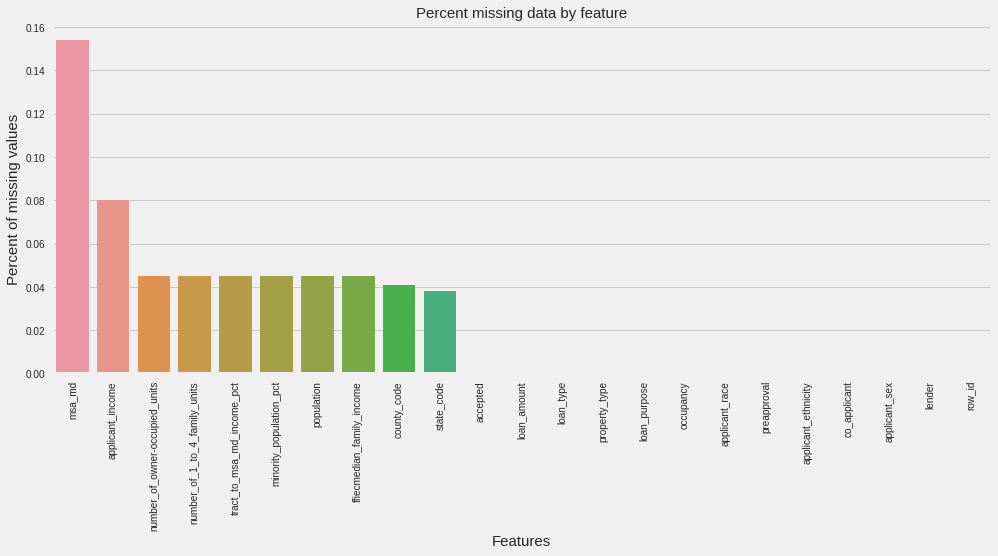

In [153]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

1    0.500228
0    0.499772
Name: accepted, dtype: float64


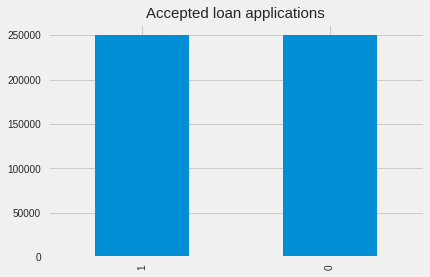

In [155]:
print(df_train['accepted'].value_counts(normalize=True))
df_train['accepted'].value_counts().plot(kind='bar')
plt.title('Accepted loan applications', fontsize=15)
plt.show() # the classes of almost uniformly distributed

In [156]:
## drop rows with missing values
print("shape before dropping missing rows", df_train.shape)
df_train_dropped = df_train.dropna()
print("shape after dropping missing rows", df_train_dropped.shape)

shape before dropping missing rows (500000, 23)
shape after dropping missing rows (387163, 23)


In [157]:
train_num_rows_lost = round(100*(df_train.shape[0] - df_train_dropped.shape[0])/float(df_train.shape[0]))
print("Lost {}% of rows in the train dataset".format(train_num_rows_lost)) ## lost about 23% of the rows from the train dataset

Lost 23% of rows in the train dataset


In [158]:
df_train.mean() #df_train mean values of each column excluding missing values

row_id                            249999.500000
loan_type                              1.366276
property_type                          1.047650
loan_purpose                           2.066810
occupancy                              1.109590
loan_amount                          221.753158
preapproval                            2.764722
msa_md                               214.838300
state_code                            24.710719
county_code                          150.753642
applicant_ethnicity                    2.036228
applicant_race                         4.786586
applicant_sex                          1.462374
applicant_income                     102.389521
population                          5416.833956
minority_population_pct               31.617310
ffiecmedian_family_income          69235.603298
tract_to_msa_md_income_pct            91.832624
number_of_owner-occupied_units      1427.718282
number_of_1_to_4_family_units       1886.147065
lender                              3720

In [159]:
##df_train_dropped mean values of each column (with missing values dropped)
df_train_dropped.mean()

row_id                            250139.968013
loan_type                              1.312543
property_type                          1.026919
loan_purpose                           2.067173
occupancy                              1.094348
loan_amount                          219.548924
preapproval                            2.807797
msa_md                               214.869293
state_code                            24.837627
county_code                          150.391760
applicant_ethnicity                    2.005520
applicant_race                         4.745621
applicant_sex                          1.434295
applicant_income                     106.261182
population                          5524.898986
minority_population_pct               33.049441
ffiecmedian_family_income          71146.670224
tract_to_msa_md_income_pct            91.782405
number_of_owner-occupied_units      1447.353221
number_of_1_to_4_family_units       1866.260774
lender                              3774

In [160]:
# percentage change in means
(df_train_dropped.mean() - df_train.mean()) / df_train.mean()

row_id                            0.000562
loan_type                        -0.039328
property_type                    -0.019788
loan_purpose                      0.000176
occupancy                        -0.013737
loan_amount                      -0.009940
preapproval                       0.015580
msa_md                            0.000144
state_code                        0.005136
county_code                      -0.002400
applicant_ethnicity              -0.015081
applicant_race                   -0.008558
applicant_sex                    -0.019201
applicant_income                  0.037813
population                        0.019950
minority_population_pct           0.045296
ffiecmedian_family_income         0.027602
tract_to_msa_md_income_pct       -0.000547
number_of_owner-occupied_units    0.013753
number_of_1_to_4_family_units    -0.010543
lender                            0.014707
co_applicant                      0.011865
accepted                          0.056897
dtype: floa

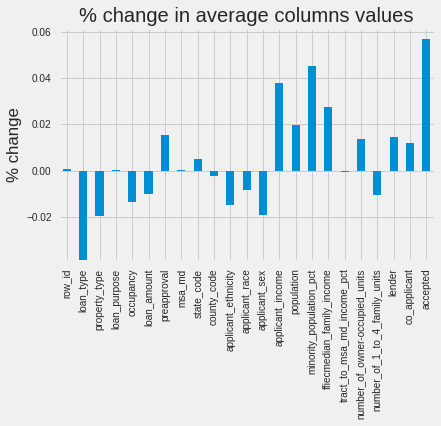

In [161]:
# percentage change in means as a bar chart
ax = ((df_train_dropped.mean() - df_train.mean()) / df_train.mean()).plot(kind="bar", title="% change in average columns values")
ax.set_ylabel("% change")
# the changes in the dataset features is too significant. Hence, dropping the missing rows isnt an option

In [162]:
# fill continuous features missing values with mediann of the features due to the presence of outliers
num_cols = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct',
                   'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
                   'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
for col in num_cols:
    df_train[col].fillna(df_train[col].median(),inplace=True)
    df_test[col].fillna(df_test[col].median(),inplace=True)

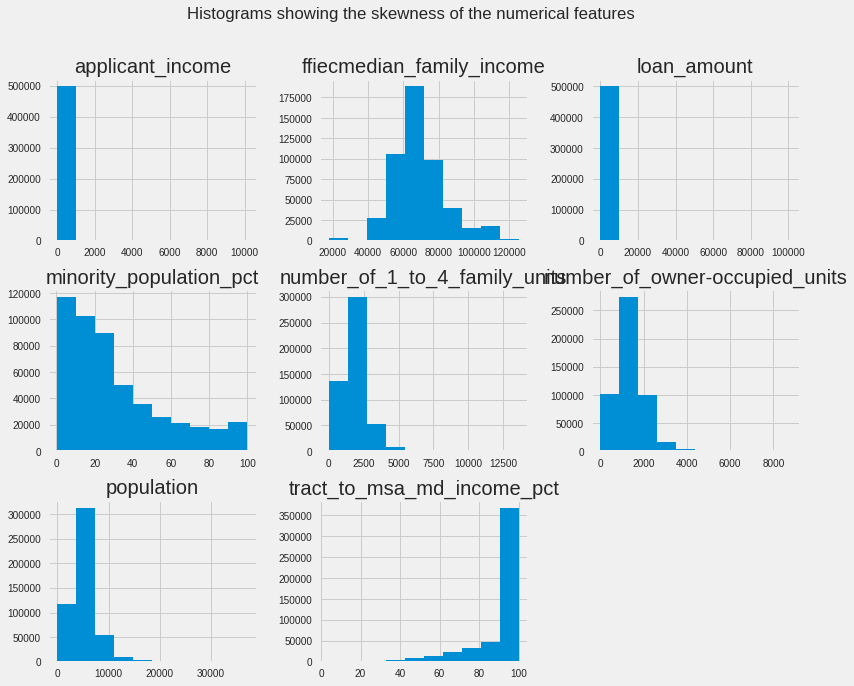

Skewness of the numerical features


loan_amount                       76.552786
applicant_income                  23.174985
population                         2.947782
minority_population_pct            1.068839
ffiecmedian_family_income          0.806355
tract_to_msa_md_income_pct        -2.035543
number_of_owner-occupied_units     1.942059
number_of_1_to_4_family_units      2.080321
dtype: float64

In [163]:
df_train[num_cols].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.savefig('Skewness.jpg')
plt.show()


print('Skewness of the numerical features')
df_train[num_cols].skew() ## we can see that loan_amount and applicant_income are highly skewed. Hence we need to apply log function to them


In [164]:
# fill categorical features missing values with the mode of the features
cat_cols = ['msa_md', 'state_code', 'county_code']
for col in cat_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

In [165]:
df_train.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

In [166]:
df_train.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18.0,37.0,246.0,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369.0,52.0,299.0,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16.0,10.0,306.0,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305.0,47.0,180.0,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24.0,37.0,20.0,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


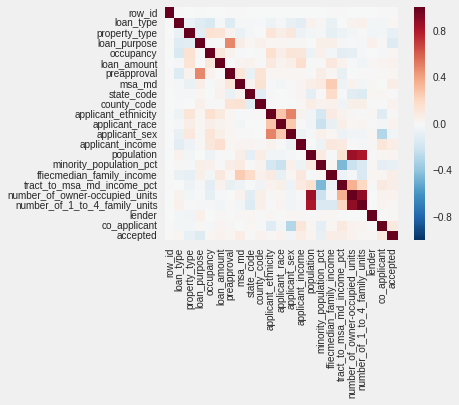

In [167]:
#Heat map
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

In [168]:
df_train.corr()['accepted']

row_id                            0.000434
loan_type                         0.018589
property_type                    -0.080603
loan_purpose                     -0.131595
occupancy                         0.022043
loan_amount                       0.046370
preapproval                       0.017209
msa_md                            0.073920
state_code                        0.004854
county_code                       0.045159
applicant_ethnicity               0.009777
applicant_race                    0.045361
applicant_sex                    -0.038391
applicant_income                  0.070658
population                        0.025540
minority_population_pct          -0.076546
ffiecmedian_family_income         0.070197
tract_to_msa_md_income_pct        0.064809
number_of_owner-occupied_units    0.040934
number_of_1_to_4_family_units     0.012038
lender                            0.008494
co_applicant                      0.101116
accepted                          1.000000
Name: accep

In [169]:
## correlation among features
df_train.corr()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,1.000000,0.002718,-0.000249,0.001466,-0.002137,-0.002647,0.001031,0.000380,-0.001023,-0.001745,...,-0.000845,-0.001022,-0.000100,0.000339,0.001632,-0.000229,-0.000604,-0.001323,0.001215,0.000434
loan_type,0.002718,1.000000,-0.065214,-0.121296,-0.158964,-0.018513,-0.133156,-0.021962,-0.020330,-0.014132,...,-0.104491,0.040495,0.012583,-0.069101,-0.002291,0.033843,0.050889,-0.027408,-0.025502,0.018589
property_type,-0.000249,-0.065214,1.000000,-0.114663,0.156139,0.135923,0.046035,-0.070220,-0.017151,-0.006713,...,-0.061199,-0.028243,-0.019480,-0.089631,-0.053266,-0.029751,0.003194,-0.035769,-0.029625,-0.080603
loan_purpose,0.001466,-0.121296,-0.114663,1.000000,0.002154,-0.002847,0.487352,0.066417,0.023254,0.049883,...,0.009488,-0.005286,0.056949,0.060785,-0.022783,-0.009738,-0.016767,0.051664,0.013419,-0.131595
occupancy,-0.002137,-0.158964,0.156139,0.002154,1.000000,0.111136,0.043719,-0.012213,-0.002853,0.006974,...,0.110005,-0.051035,0.049574,-0.024807,-0.101758,-0.087846,-0.019253,-0.001298,-0.016899,0.022043
loan_amount,-0.002647,-0.018513,0.135923,-0.002847,0.111136,1.000000,-0.001796,0.024991,0.046127,0.003051,...,0.164667,0.000421,0.007774,0.104762,0.041823,-0.013190,-0.035866,0.011496,0.025590,0.046370
preapproval,0.001031,-0.133156,0.046035,0.487352,0.043719,-0.001796,1.000000,0.118642,-0.067803,0.138065,...,0.016820,0.002174,0.064595,0.017152,-0.075085,-0.006440,0.001400,0.000559,0.013920,0.017209
msa_md,0.000380,-0.021962,-0.070220,0.066417,-0.012213,0.024991,0.118642,1.000000,0.032403,0.148142,...,0.030688,0.067229,0.087709,0.252272,-0.050783,0.045542,-0.029155,0.012152,-0.004126,0.073920
state_code,-0.001023,-0.020330,-0.017151,0.023254,-0.002853,0.046127,-0.067803,0.032403,1.000000,-0.111393,...,0.025536,-0.093880,0.004482,0.194293,-0.010032,-0.114838,-0.137258,0.018699,0.020503,0.004854
county_code,-0.001745,-0.014132,-0.006713,0.049883,0.006974,0.003051,0.138065,0.148142,-0.111393,1.000000,...,0.009461,0.076481,0.034385,0.053106,-0.043176,0.055234,0.058649,0.002333,0.002863,0.045159


In [170]:
df_train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [171]:
## checking for categories
cat_col = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'msa_md', 
           'state_code', 'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex',
           'lender', 'co_applicant']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique loan_type 4
Number of unique property_type 3
Number of unique loan_purpose 3
Number of unique occupancy 3
Number of unique preapproval 3
Number of unique msa_md 408
Number of unique state_code 52
Number of unique county_code 317
Number of unique applicant_ethnicity 4
Number of unique applicant_race 7
Number of unique applicant_sex 4
Number of unique lender 6111
Number of unique co_applicant 2


In [172]:
# unique features from each category for the necessary features
unique_cat_col =  ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 
                   'applicant_ethnicity', 'applicant_race', 'applicant_sex',  'co_applicant']
for cat in unique_cat_col:
    print(df_train[cat].unique())

[3 1 2 4]
[1 2 3]
[1 3 2]
[1 2 3]
[3 1 2]
[2 1 3 4]
[5 3 6 2 1 7 4]
[1 2 3 4]
[0 1]


In [173]:
## create new features
old_cols = ['minority_population_pct', 'tract_to_msa_md_income_pct']
for col in old_cols:
    df_train['minority_population'] = (df_train[col] / 100) * (df_train['population'])
    df_train['tract_family_income'] = (df_train[col] / 100) * (df_train['ffiecmedian_family_income'])

df_train["minority_population"] = df_train["minority_population"].apply(math.log)
df_test["minority_population"] = df_test["minority_population"].apply(math.log)

In [174]:
## create new features
old_cols = ['minority_population_pct', 'tract_to_msa_md_income_pct']
for col in old_cols:
    df_test['minority_population'] = (df_test[col] / 100) * (df_test['population'])
    df_test['tract_family_income'] = (df_test[col] / 100) * (df_test['ffiecmedian_family_income'])

In [175]:
df_test.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,minority_population,tract_family_income
0,0,2,1,3,1,115.0,3,101.0,16.0,276.0,...,6329.0,59.536,69889.0,85.78,1874.0,2410.0,3791,1,5429.0162,59950.7842
1,1,1,1,1,1,252.0,2,87.0,20.0,68.0,...,2473.0,8.050,65313.0,100.00,947.0,1214.0,2839,1,2473.0000,65313.0000
2,2,1,1,1,1,270.0,1,24.0,37.0,20.0,...,4975.0,22.955,67514.0,100.00,1326.0,1753.0,4701,0,4975.0000,67514.0000
3,3,2,1,1,1,179.0,2,376.0,20.0,11.0,...,4795.0,29.676,57766.0,100.00,1426.0,1765.0,2153,1,4795.0000,57766.0000
4,4,2,1,1,1,36.0,2,254.0,48.0,156.0,...,5246.0,5.110,63332.0,100.00,1452.0,2092.0,5710,0,5246.0000,63332.0000


In [176]:
loan_type = {1:'conventional', 2:'unconventional', 3:'unconventional', 4:'unconventional'}
loan_purpose = {1:'home_purchase', 2:'others', 3:'others'}
occupancy = {1:'owner', 2:'others', 3:'others'}
preapproval = {1:'(not)requested', 2:'(not)requested', 3:'not_applicable', 4:'(not)requested'}
ethnicity = {1:'others', 2:'not_hispanic', 3:'others', 4:'others'}
race = {1:'others', 2:'others', 3:'others', 4:'others', 5:'white', 6:'others', 7: 'others'}
sex = {1: 'male', 2: 'female', 3:'others', 4: 'others'}
property_type = {1:'nuclear_family',2:'others',3:'others'}
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['loan_type']=dataset['loan_type'].replace(loan_type)
    dataset['property_type']=dataset['property_type'].replace(property_type)
    dataset['loan_purpose']=dataset['loan_purpose'].replace(loan_purpose)
    dataset['occupancy']=dataset['occupancy'].replace(occupancy)
    dataset['preapproval']=dataset['preapproval'].replace(preapproval)
    dataset['applicant_ethnicity']=dataset['applicant_ethnicity'].replace(ethnicity)
    dataset['applicant_race']=dataset['applicant_race'].replace(race)
    dataset['applicant_sex']=dataset['applicant_sex'].replace(sex)

In [177]:
df_train.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted', 'minority_population',
       'tract_family_income'],
      dtype='object')

In [178]:
df_train.corr()['accepted']

row_id                            0.000434
loan_amount                       0.046370
msa_md                            0.073920
state_code                        0.004854
county_code                       0.045159
applicant_income                  0.070658
population                        0.025540
minority_population_pct          -0.076546
ffiecmedian_family_income         0.070197
tract_to_msa_md_income_pct        0.064809
number_of_owner-occupied_units    0.040934
number_of_1_to_4_family_units     0.012038
lender                            0.008494
co_applicant                      0.101116
accepted                          1.000000
minority_population               0.039261
tract_family_income               0.097705
Name: accepted, dtype: float64

In [179]:
train_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy',
               'loan_amount', 'preapproval','msa_md', 'state_code', 'county_code',
               'applicant_ethnicity', 'applicant_race', 'applicant_sex',
               'applicant_income', 'population', 'minority_population',
               'ffiecmedian_family_income', 'tract_family_income',
               'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
               'lender', 'co_applicant', 'accepted']
test_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy',
               'loan_amount', 'preapproval','msa_md', 'state_code', 'county_code',
               'applicant_ethnicity', 'applicant_race', 'applicant_sex',
               'applicant_income', 'population', 'minority_population',
               'ffiecmedian_family_income', 'tract_family_income',
               'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
               'lender', 'co_applicant']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [180]:
train_data.corr()['accepted']

loan_amount                       0.046370
msa_md                            0.073920
state_code                        0.004854
county_code                       0.045159
applicant_income                  0.070658
population                        0.025540
minority_population               0.039261
ffiecmedian_family_income         0.070197
tract_family_income               0.097705
number_of_owner-occupied_units    0.040934
number_of_1_to_4_family_units     0.012038
lender                            0.008494
co_applicant                      0.101116
accepted                          1.000000
Name: accepted, dtype: float64

In [181]:
train_data.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population,ffiecmedian_family_income,tract_family_income,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,unconventional,nuclear_family,home_purchase,owner,70.0,not_applicable,18.0,37.0,246.0,not_hispanic,...,24.0,6203.0,3159.37399,60588.0,30859.28604,716.0,2642.0,4536,0,1
1,conventional,nuclear_family,others,owner,178.0,not_applicable,369.0,52.0,299.0,others,...,57.0,5774.0,5774.00000,54821.0,54821.00000,1622.0,2108.0,2458,0,0
2,unconventional,nuclear_family,others,owner,163.0,not_applicable,16.0,10.0,306.0,not_hispanic,...,67.0,6094.0,6094.00000,67719.0,67719.00000,760.0,1048.0,5710,0,1
3,conventional,nuclear_family,home_purchase,owner,155.0,(not)requested,305.0,47.0,180.0,not_hispanic,...,105.0,6667.0,6667.00000,78439.0,78439.00000,2025.0,2299.0,5888,1,1
4,conventional,nuclear_family,home_purchase,owner,305.0,not_applicable,24.0,37.0,20.0,not_hispanic,...,71.0,6732.0,5533.70400,63075.0,51847.65000,1464.0,1847.0,289,0,1


## relationship between the categorical features and the target variable
def plot_box(df_train, cols, col_y = 'accepted'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.pointplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','applicant_ethnicity', 
        'applicant_race', 'applicant_sex', 'co_applicant']
plot_box(df_train, cat_cols)    

In [182]:
cat_cols_low_card = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','applicant_ethnicity', 
        'applicant_race', 'applicant_sex', 'co_applicant']

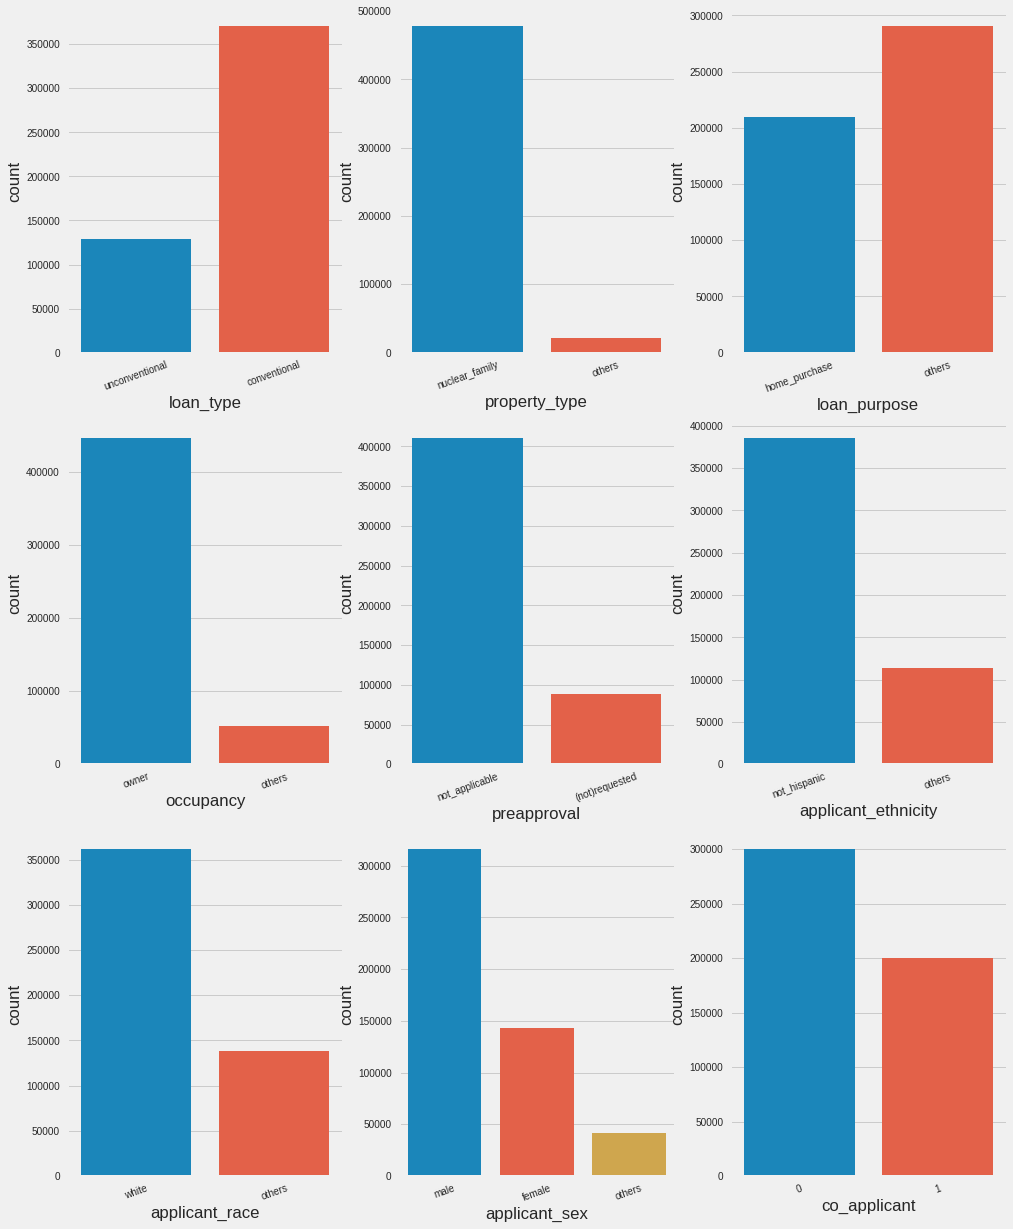

In [183]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))
for variable, subplot in zip(cat_cols_low_card, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)
plt.savefig('before_grouped_cat.jpg')

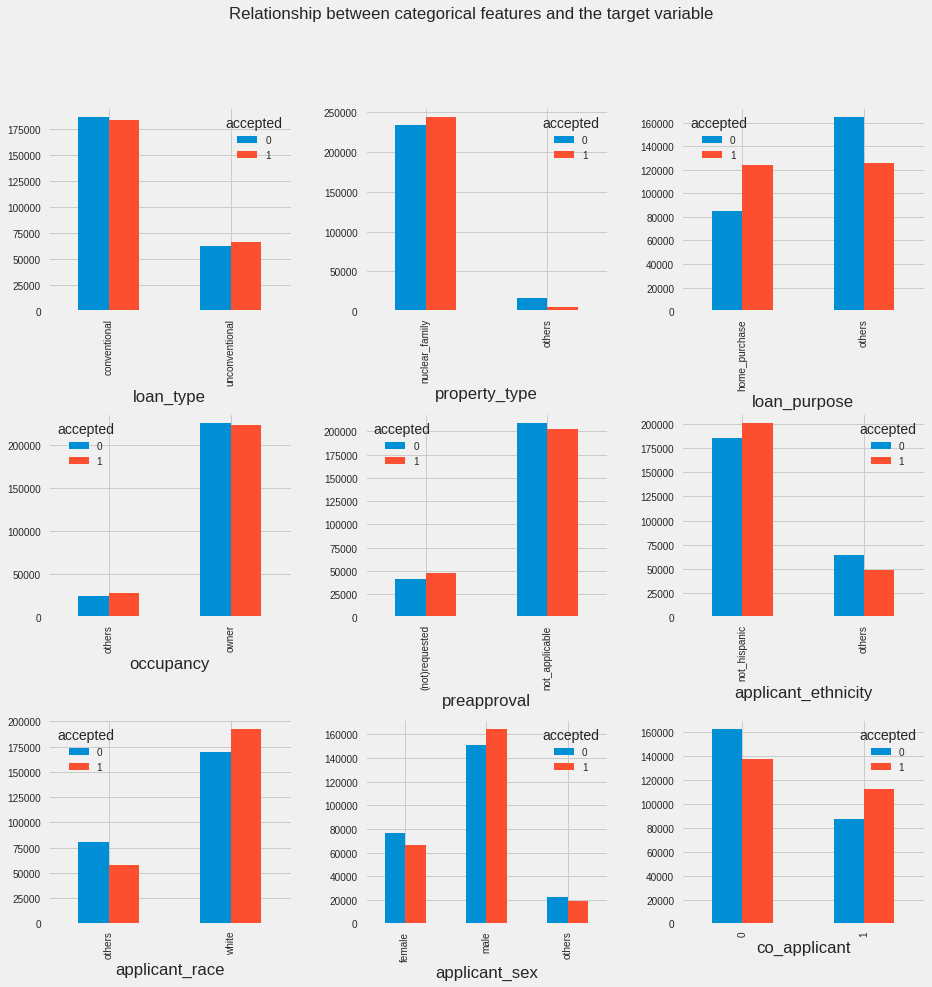

In [184]:
#Relationship between the categoric features and the target variable
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (14,14))
fig.suptitle("Relationship between categorical features and the target variable")
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
for ax, col in zip(axes.flatten(), cat_cols_low_card) :
    pd.crosstab(df_train[col], df_train["accepted"]).plot(kind="bar", ax = ax)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)
    ax.set_xlabel(col)  
plt.savefig('corr_cat_target.jpg')

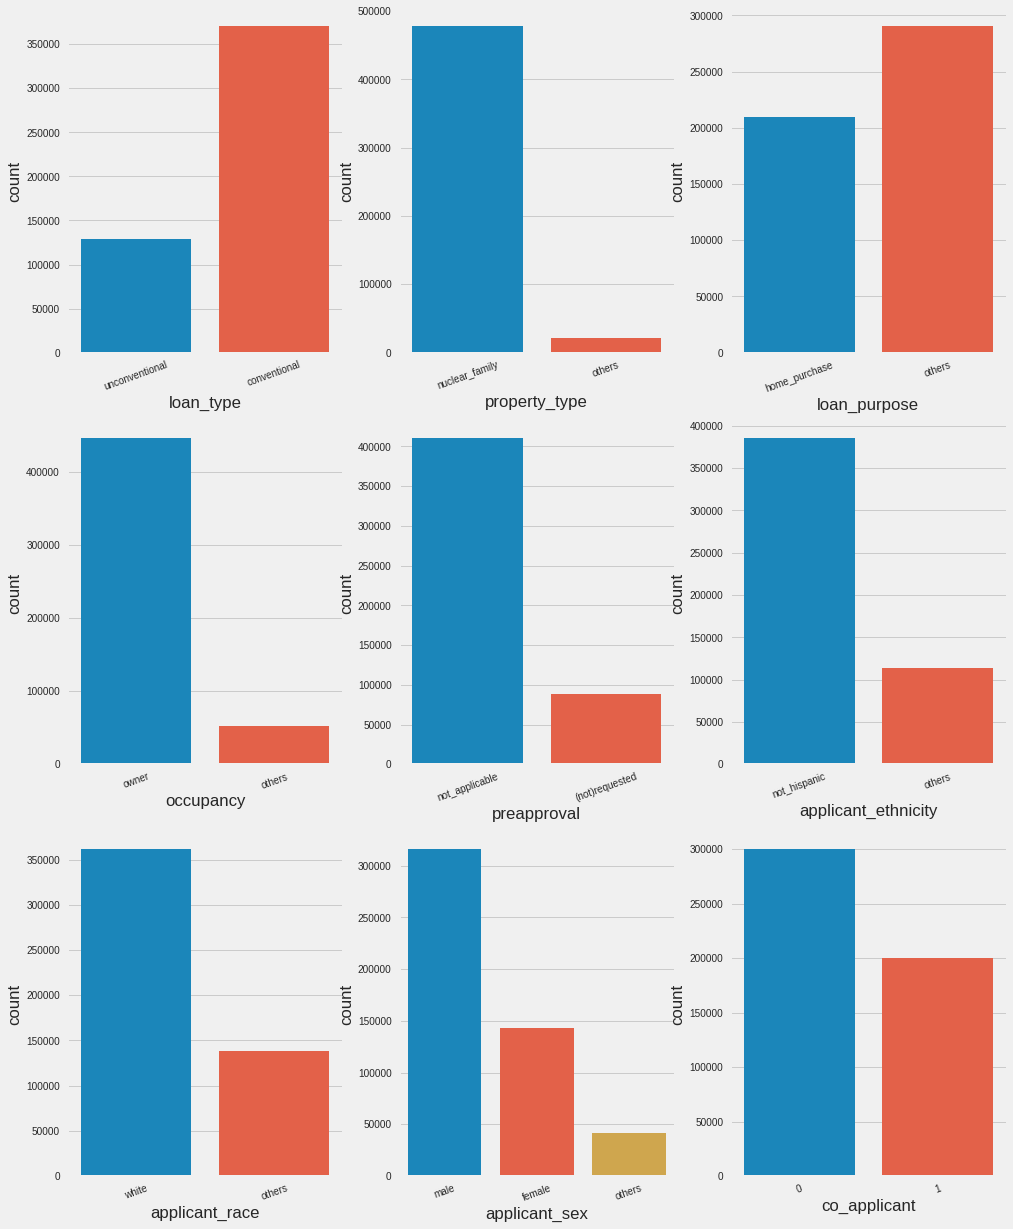

In [185]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))
for variable, subplot in zip(cat_cols_low_card, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)
plt.savefig('regrouped_cat.jpg')

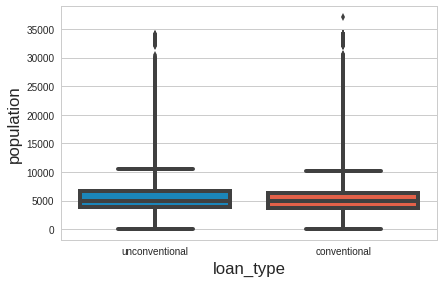

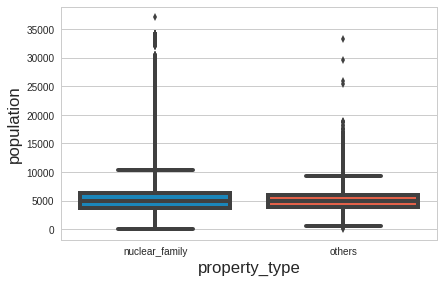

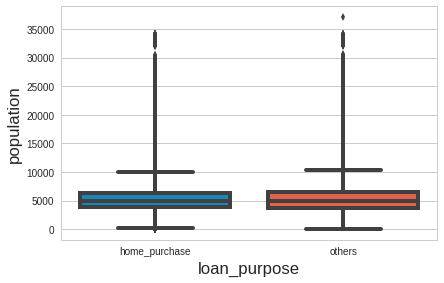

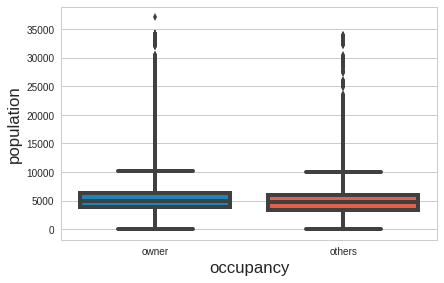

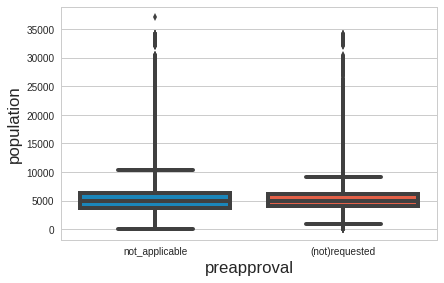

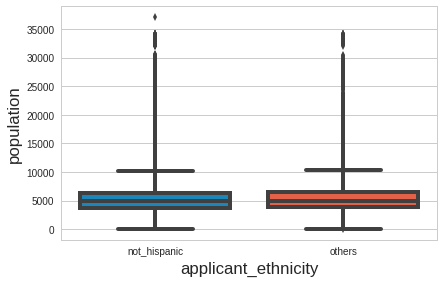

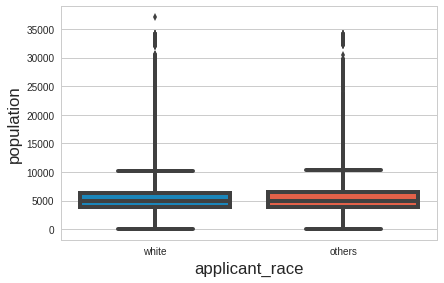

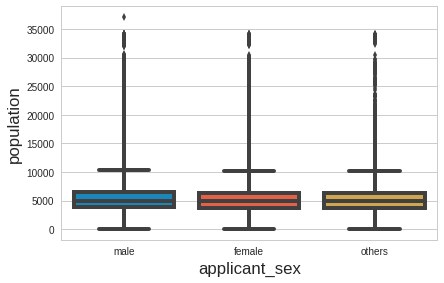

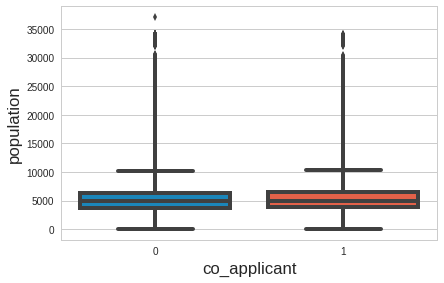

In [186]:
## relationship between the label (numeric variables) and the features (categorical variables)
def plot_box(df_train, cols, col_y = 'population'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval','applicant_ethnicity', 
        'applicant_race', 'applicant_sex', 'co_applicant']
plot_box(df_train, cat_cols)    

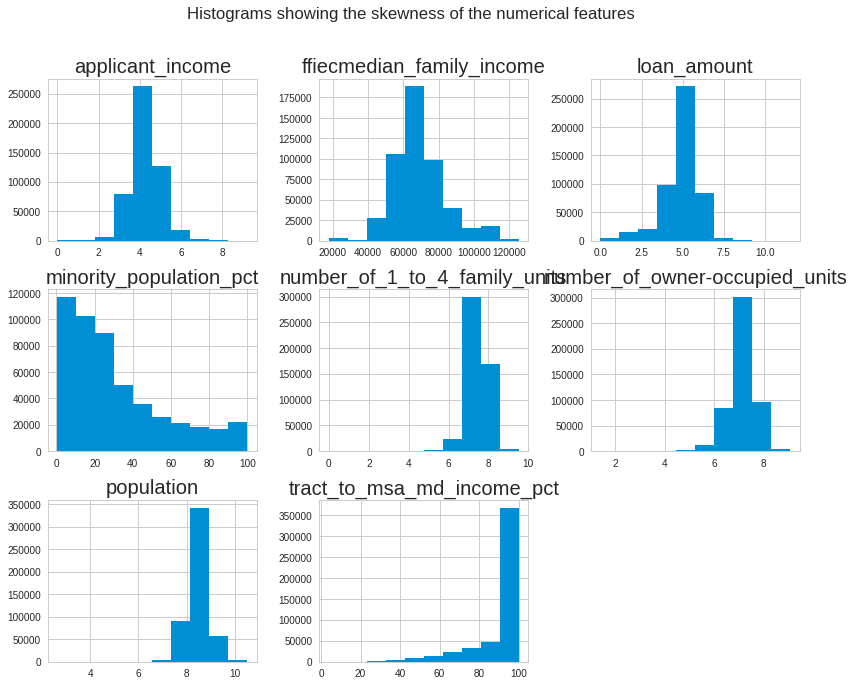

Skewness of the numerical features


loan_amount                      -1.190548
applicant_income                  0.029289
population                       -0.159924
minority_population_pct           1.068839
ffiecmedian_family_income         0.806355
tract_to_msa_md_income_pct       -2.035543
number_of_owner-occupied_units   -1.116117
number_of_1_to_4_family_units    -1.615771
dtype: float64

In [187]:
import math
to_log = ['loan_amount', 'applicant_income', 'population', 
            'number_of_owner-occupied_units',  'number_of_1_to_4_family_units']
df_train[to_log] = df_train[to_log].applymap(math.log)
df_test[to_log] = df_test[to_log].applymap(math.log)

df_train[num_cols].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.savefig('Skewness1.jpg')
plt.show()

print('Skewness of the numerical features')
df_train[num_cols].skew() 

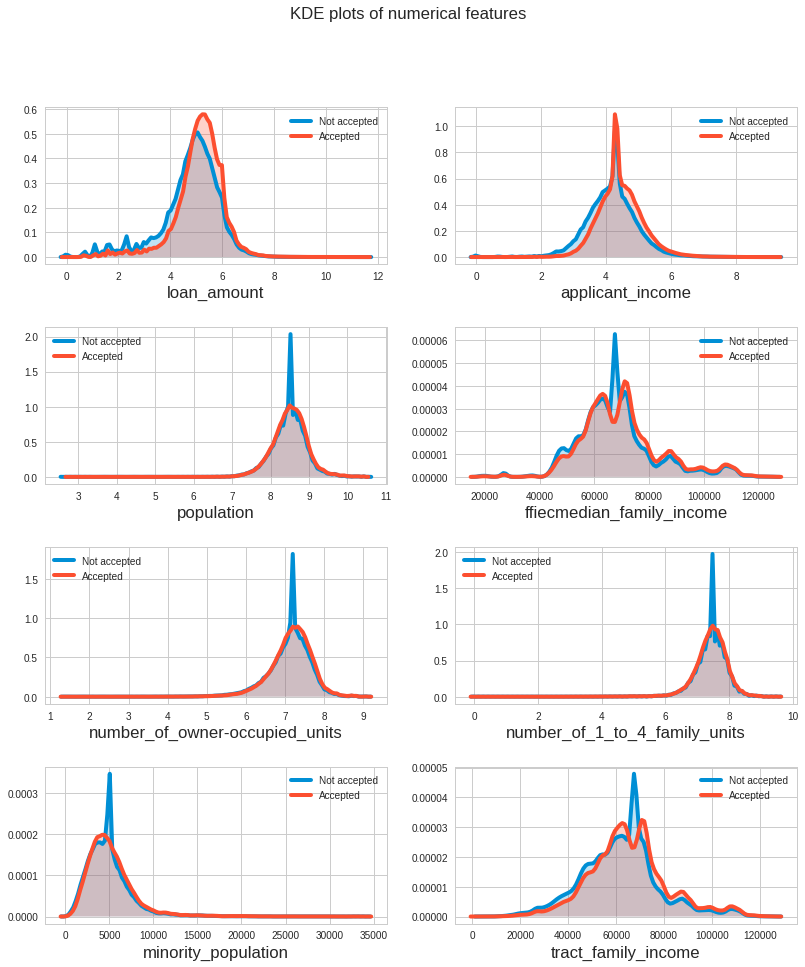

In [198]:
#KDE plot of numerical features
KDE_num_cols = ['loan_amount', 'applicant_income', 'population',
                   'ffiecmedian_family_income',
                   'number_of_owner-occupied_units', 'number_of_1_to_4_family_units', 'minority_population',
           'tract_family_income']

fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (12,14))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("KDE plots of numerical features")

for ax, col in zip(axes.flatten(), train_data[KDE_num_cols]) :
    sns.kdeplot(df_train[df_train['accepted'] == 0][col], shade="True", label="Not accepted", ax = ax)
    sns.kdeplot(df_train[df_train['accepted'] == 1][col], shade="True", label="Accepted", ax = ax)
    ax.set_xlabel(col)
plt.savefig('KDE_num_vs_target.jpg')

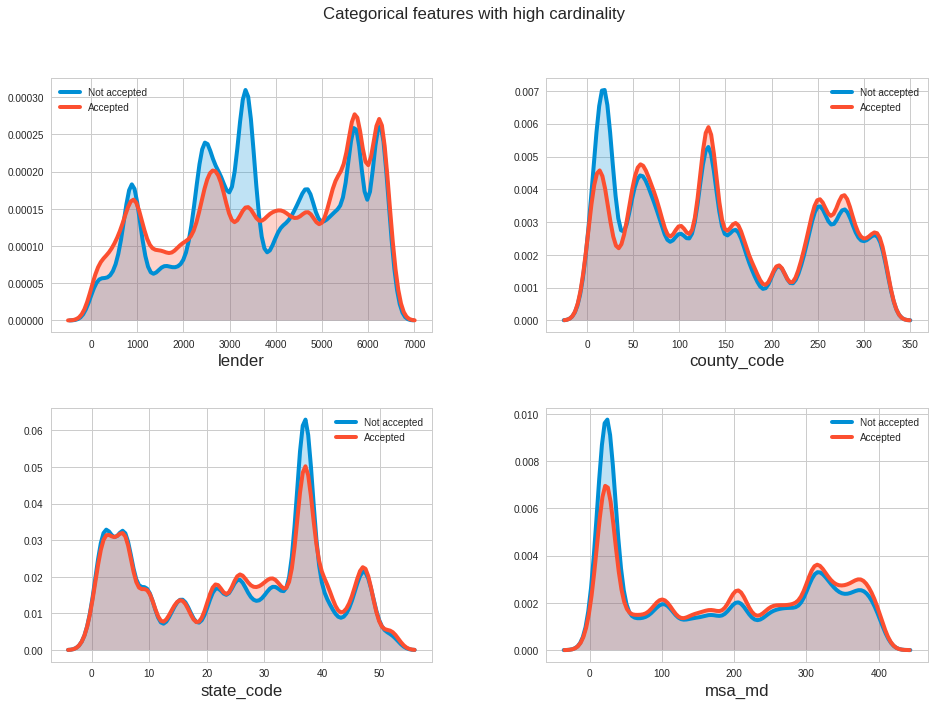

In [201]:
high_cat_cols = ['lender','county_code','state_code','msa_md']
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (14,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
fig.suptitle("Categorical features with high cardinality")

for ax, col in zip(axes.flatten(), high_cat_cols) :
    sns.kdeplot(train[train['accepted'] == 0][col], shade='True', label='Not accepted', ax = ax)
    sns.kdeplot(train[train['accepted'] == 1][col], shade='True', label='Accepted', ax = ax)
    ax.set_xlabel(col)
plt.savefig('high_card_cols.jpg')

In [ ]:
print('shape of train data:',train_data.shape)
print('shape of test data:',test_data.shape)

In [42]:
## dummify low cardinality categorical features
cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 
        'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value

In [43]:
train.corr()['accepted']

loan_amount                          0.169416
msa_md                               0.073920
state_code                           0.004854
county_code                          0.045159
applicant_income                     0.178756
population                           0.020702
minority_population                  0.064777
ffiecmedian_family_income            0.070197
tract_family_income                  0.097705
number_of_owner-occupied_units       0.035664
number_of_1_to_4_family_units        0.001359
lender                               0.008494
accepted                             1.000000
loan_type__conventional             -0.014503
loan_type__unconventional            0.014503
property_type__nuclear_family        0.098751
property_type__others               -0.098751
loan_purpose__home_purchase          0.159822
loan_purpose__others                -0.159822
occupancy__others                    0.019216
occupancy__owner                    -0.019216
preapproval__(not)requested       

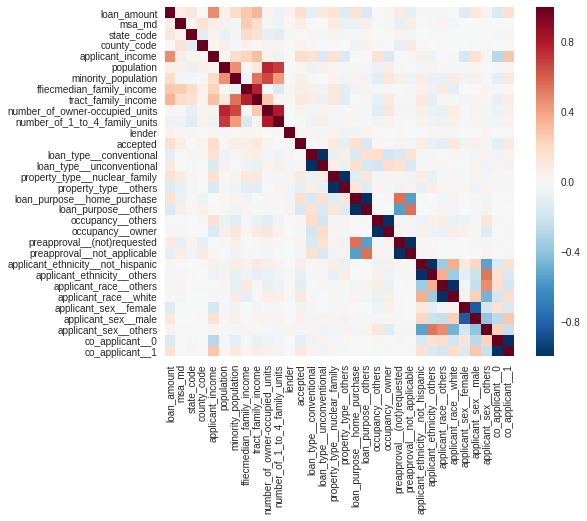

In [209]:
#Heat map
corrmat= train.corr()
f, ax =plt.subplots(figsize=(7,6))
sns.heatmap(corrmat, square=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [ ]:
train.columns

In [ ]:
features = ['loan_amount', 'msa_md', 'state_code', 'county_code',
       'applicant_income', 'population', 'minority_population',
       'ffiecmedian_family_income', 'tract_family_income',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender','loan_type__conventional',
       'loan_type__unconventional', 'property_type__nuclear_family',
       'property_type__others', 'loan_purpose__home_purchase',
       'loan_purpose__others', 'occupancy__others', 'occupancy__owner',
       'preapproval__(not)requested', 'preapproval__not_applicable',
       'applicant_ethnicity__not_hispanic', 'applicant_ethnicity__others',
       'applicant_race__others', 'applicant_race__white',
       'applicant_sex__female', 'applicant_sex__male', 'applicant_sex__others',
       'co_applicant__0', 'co_applicant__1']

In [ ]:
predicted_class_name = ['accepted']
X = train[features].values
y = train[predicted_class_name].values
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

In [ ]:
colu = ['loan_amount', 'msa_md', 'state_code', 'county_code',
       'applicant_income', 'population', 'minority_population',
       'ffiecmedian_family_income', 'tract_family_income',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender','loan_type__conventional',
       'loan_type__unconventional', 'property_type__nuclear_family',
       'property_type__others', 'loan_purpose__home_purchase',
       'loan_purpose__others', 'occupancy__others', 'occupancy__owner',
       'preapproval__(not)requested', 'preapproval__not_applicable',
       'applicant_ethnicity__not_hispanic', 'applicant_ethnicity__others',
       'applicant_race__others', 'applicant_race__white',
       'applicant_sex__female', 'applicant_sex__male', 'applicant_sex__others',
       'co_applicant__0', 'co_applicant__1']
test1=test[colu]

In [ ]:
print(X_train.shape)
print(test1.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [ ]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [ ]:
probabilities = reg.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)   

In [ ]:
solution=reg.predict(test1)
#np.savetxt('LogisticRegressionMicrosoft.csv', solution, delimiter=',')
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('LogisticRegressionMicrosoftCapstoneProj.csv', index=False)


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()

In [ ]:
probabilities = rf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
solution=rf.predict(test1)
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('RandomForestMicrosoftCapstoneProj.csv', index=False)

In [ ]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)

In [ ]:
plt.bar(range(len(adb.feature_importances_)), adb.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [ ]:
probabilities = adb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
solution=adb.predict(test1)
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('AdaBoost10Academy.csv', index=False)

In [ ]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

In [ ]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
solution=xgb.predict(test1)
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('XgboostClassifierMicrosoftCapstoneProj.csv', index=False)

In [ ]:
mlp=MLPClassifier()
mlp.fit(X_train, y_train)

In [ ]:
probabilities = mlp.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
solution=mlp.predict(test1)
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('NeuralNetworkClassifierMicrosoftCapstoneProj.csv', index=False)

In [ ]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train, y_train.ravel())

In [ ]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.title('Feature Importance')
plt.show()

In [ ]:
probabilities = gbr.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
solution=gbr.predict(test1)
my_submission=pd.DataFrame({'row_id':df_test.row_id,'accepted': solution})
my_submission.to_csv('GradientBoostingMicrsoftCapstoneProj.csv', index=False)